In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Thermal optimal path

## Synthetic examples

We reproduce some of the results from [Non-parametric Determination of Real-Time Lag Structure between Two Time Series: the “Optimal Thermal Causal Path” Method, D.Sornette and  W.-X. Zhou (2004)](https://arxiv.org/abs/cond-mat/0408166).

In [2]:
def standardise(ts):
    ts -= np.mean(ts)
    return ts / np.std(ts)

In [3]:
np.random.seed(1)

error_x = 0.1
error_y = error_x / 5
x = np.zeros(300)
y = np.zeros(300)

for i in range(1, 300):
    x[i] = 0.7 * x[i-1] + error_x * np.random.randn(1)
    
for i in range(10, 100):
    y[i] = x[i-10] + error_y * np.random.randn(1)
    
for i in range(100, 200):
    y[i] = -x[i-5] + error_y * np.random.randn(1)
    
for i in range(200, 300-5):
    y[i] = x[i+5] + error_y * np.random.randn(1)
    
x = standardise(x)
y = standardise(y)

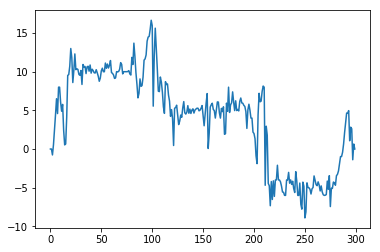

In [4]:
from thermal_optimal_path.lattice import partition_function
from thermal_optimal_path.statistics import average_path

temperature = 0.1
g = partition_function(x, y, temperature)
avg = average_path(g)
plt.plot(avg[::2])

## Running time measurements

We motivate the Numba implementation provided by comparing it to running the same Python code in the original interpreter. Running time is reduced by a factor of ~1000.

In [5]:
%%timeit
g = partition_function(x, y, 0.1)

1.75 ms ± 8.49 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
from thermal_optimal_path.error_models import error
from thermal_optimal_path.lattice import _partition_function_impl

In [7]:
%%timeit
g = _partition_function_impl.py_func(x, y, 0.1, error)

2.13 s ± 3.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
